In [1]:
#!usr/bin/env python
# -*- coding: utf-8 -*-

## -- Script Meta Data --
## Author  : Julien Lerat, CSIRO L&W
## Created : 2022-08-16 Tue 05:57 PM
## Comment : Download rating curves from Water NSW
##           API reference : https://kisters.com.au/doco/hydllp.htm
##
## ------------------------------
import sys, os, re, json, math
from datetime import datetime
from pathlib import Path
from datetime import datetime
import requests
import argparse
import numpy as np
import pandas as pd
#import iutils

from tqdm import tqdm

#----------------------------------------------------------------------
# Config
#----------------------------------------------------------------------

url_kiwis = "https://realtimedata.waternsw.com.au/cgi/webservice.exe"

#----------------------------------------------------------------------
# Folders
#----------------------------------------------------------------------
#source_file = Path(__file__).resolve()
#froot = source_file.parent.parent.parent

fdata  = Path("R:/source/cross_sections/gaugings/")
fdata.mkdir(exist_ok=True)

fgaugings = fdata / "gaugings"
fgaugings.mkdir(exist_ok=True, parents=True)

basename = fdata #source_file.stem
#LOGGER = iutils.get_logger(basename)

#----------------------------------------------------------------------
# Get data
#----------------------------------------------------------------------

sites = pd.DataFrame( np.array(['410021' , '410130']))

#----------------------------------------------------------------------
# Process
#----------------------------------------------------------------------

# Utility function to generate url corresponding to query
def query2url(query):
    c1, c2 = "'", "\""
    txt = re.sub(c1, c2, str(query))
    return f"{url_kiwis}?{txt}".strip()

# Download rating tables
datasource = "A"
api_version = "3"
nsites = len(sites)
print(sites)
print(enumerate(sites.iterrows()))
tbar = tqdm(enumerate(sites), total=nsites, desc="downloading Gaugings")

for isite, (siteid, info) in tbar:
    # Download rating table for each time
    query = {\
        "function": "get_db_info", \
        "version": api_version, \
        "params": {\
            "table_name": "GAUGINGS", \
            "sitelist_filter": str(siteid), \
            "return_type": "array"
        }
    }

    url = query2url(query)
    req = requests.get(url)

    if req.status_code == 200:
        js = req.json()
        if len(js["return"]) == 0:
            continue
        if not "rows" in js["return"]:
            continue

        gau = pd.DataFrame(js["return"]["rows"])
        if len(gau) == 0:
            continue

        cols = [cn.upper() for cn in gau.columns]
        gau.columns = cols
        rename = {"STN": "STATIONID", "MAXVEL": "MAXIMUM_VELOCITY[m/sec]", \
                   "MEAS_DATE": "TIME", \
                   "WIDTH": "RIVER_WIDTH[m]", \
                   "MAXDEPTH": "MAXIMUM_DEPTH[m]", \
                   "SLOPE": "BED_SLOPE[adim]", \
                   "FLOW": "STREAMFLOW[m3/sec]", \
                   "AREA": "AREA[m2]", \
                   "START_GH": "WATERLEVEL_START[m]", \
                   "M_GH": "WATERLEVEL_MEAN[m]"
                   }
        for cn in cols:
            if not cn in rename:
                rename[cn] = f"{cn}[undef]"
        gau = gau.rename(columns=rename)

        gau.loc[:, "TIME"] = pd.to_datetime(gau.TIME, format="%Y%m%d")

        # Convert from ML/day to to m3/sec
        gau.loc[:, "STREAMFLOW[m3/sec]"] = \
                gau.loc[:, "STREAMFLOW[m3/sec]"].astype(float)/86.4

        fg = fgaugings / f"{siteid}_gaugings.csv"
        gau.to_csv(fg)




        0
0  410021
1  410130


downloading Gaugings:   0%|          | 0/2 [00:00<?, ?it/s]


TypeError: cannot unpack non-iterable int object

In [2]:
#!usr/bin/env python
# -*- coding: utf-8 -*-

## -- Script Meta Data --
## Author  : Julien Lerat, CSIRO L&W
## Created : 2022-08-16 Tue 05:57 PM
## Comment : Download rating curves from Water NSW
##           API reference : https://kisters.com.au/doco/hydllp.htm
##
## ------------------------------


#----------------------------------------------------------------------
# Config
#----------------------------------------------------------------------

url_kiwis = "https://realtimedata.waternsw.com.au/cgi/webservice.exe"

#----------------------------------------------------------------------
# Folders
#----------------------------------------------------------------------
#source_file = Path(__file__).resolve()
#froot = source_file.parent.parent.parent

fdata  = Path("R:/source/cross_sections/gaugings/")
fdata.mkdir(exist_ok=True)

fgaugings = fdata / "gaugings"
fgaugings.mkdir(exist_ok=True, parents=True)

basename = fdata #source_file.stem
#LOGGER = iutils.get_logger(basename)

#----------------------------------------------------------------------
# Get data
#----------------------------------------------------------------------

sites = pd.DataFrame( np.array([410021 , 410130]))

#----------------------------------------------------------------------
# Process
#----------------------------------------------------------------------

siteid = sites[0][0] 

# Utility function to generate url corresponding to query
def query2url(query):
    c1, c2 = "'", "\""
    txt = re.sub(c1, c2, str(query))
    return f"{url_kiwis}?{txt}".strip()

# Download rating tables
datasource = "A"
api_version = "3"
nsites = len(sites)

# Download rating table for each time
query = {\
    "function": "get_db_info", \
    "version": api_version, \
    "params": {\
        "table_name": "GAUGINGS", \
        "sitelist_filter": str(siteid), \
        "return_type": "array"
    }
}
print(query)
url = query2url(query)
req = requests.get(url)

if req.status_code == 200:
    js = req.json()

    gau = pd.DataFrame(js["return"]["rows"])
    print(gau)

    cols = [cn.upper() for cn in gau.columns]
    gau.columns = cols
    rename = {"STN": "STATIONID", "MAXVEL": "MAXIMUM_VELOCITY[m/sec]", \
                "MEAS_DATE": "TIME", \
                "WIDTH": "RIVER_WIDTH[m]", \
                "MAXDEPTH": "MAXIMUM_DEPTH[m]", \
                "SLOPE": "BED_SLOPE[adim]", \
                "FLOW": "STREAMFLOW[m3/sec]", \
                "AREA": "AREA[m2]", \
                "START_GH": "WATERLEVEL_START[m]", \
                "M_GH": "WATERLEVEL_MEAN[m]"
                }
    for cn in cols:
        if not cn in rename:
            rename[cn] = f"{cn}[undef]"
    gau = gau.rename(columns=rename)

    print(gau)

    gau.loc[:, "TIME"] = pd.to_datetime(gau.TIME, format="%Y%m%d")

    # Convert from ML/day to to m3/sec
    gau.loc[:, "STREAMFLOW[m3/sec]"] = \
            gau.loc[:, "STREAMFLOW[m3/sec]"].astype(float)/86.4

    fg = fgaugings / f"{siteid}_gaugings.csv"
    gau.to_csv(fg)




{'function': 'get_db_info', 'version': '3', 'params': {'table_name': 'GAUGINGS', 'sitelist_filter': '410021', 'return_type': 'array'}}
        stn    ctf endsgh end_gh method    meter_no gshift  velocity  \
0    410021  0.000  0.000  1.041     ..   .........   0.00  -999.999   
1    410021  0.000  0.000  0.432     ..   .........   0.00  -999.999   
2    410021  0.000  0.000  2.172     ..   .........   0.00  -999.999   
3    410021  0.000  0.000  1.803     ..   .........   0.00  -999.999   
4    410021  0.000  0.000  1.626     ..   .........   0.00  -999.999   
..      ...    ...    ...    ...    ...         ...    ...       ...   
645  410021  0.000  2.398  2.400     AD  RS52124004   0.00    32.590   
646  410021  0.000  1.381  1.380     AD  RS52124004   0.00    20.490   
647  410021  0.000  1.251  1.248     AD  RS52124004   0.00    18.290   
648  410021  0.000  1.251  1.258     AD          M9   0.00    19.630   
649  410021  0.000  1.491  1.490     AD  RS52124004   0.00    22.430   



C:\Users\rob635\AppData\Local\Temp\ipykernel_21140\1108087089.py:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1938-04-04 00:00:00', '1939-02-21 00:00:00', '1939-03-07 00:00:00',
 '1939-03-08 00:00:00', '1939-03-08 00:00:00', '1939-03-09 00:00:00',
 '1939-03-09 00:00:00', '1939-03-10 00:00:00', '1939-03-13 00:00:00',
 '1939-03-14 00:00:00',
 ...
 '2023-05-01 00:00:00', '2023-05-29 00:00:00', '2023-09-08 00:00:00',
 '2023-10-27 00:00:00', '2023-11-27 00:00:00', '2024-01-17 00:00:00',
 '2024-03-20 00:00:00', '2024-05-21 00:00:00', '2024-05-21 00:00:00',
 '2024-07-19 00:00:00']
Length: 650, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gau.loc[:, "TIME"] = pd.to_datetime(gau.TIME, format="%Y%m%d")


In [3]:
#!usr/bin/env python
# -*- coding: utf-8 -*-

## -- Script Meta Data --
## Author  : Julien Lerat, CSIRO L&W
## Created : 2022-08-16 Tue 05:57 PM
## Comment : Download rating curves from Water NSW
##           API reference : https://kisters.com.au/doco/hydllp.htm
##
## ------------------------------


#----------------------------------------------------------------------
# Config
#----------------------------------------------------------------------

url_kiwis = "https://realtimedata.waternsw.com.au/cgi/webservice.exe"

#----------------------------------------------------------------------
# Folders
#----------------------------------------------------------------------
#source_file = Path(__file__).resolve()
#froot = source_file.parent.parent.parent

fdata  = Path("R:/source/cross_sections/gaugings/")
fdata.mkdir(exist_ok=True)

fgaugings = fdata / "gaugings"
fgaugings.mkdir(exist_ok=True, parents=True)

basename = fdata #source_file.stem
#LOGGER = iutils.get_logger(basename)

#----------------------------------------------------------------------
# Get data
#----------------------------------------------------------------------

sites = pd.DataFrame( np.array([410021 , 410130]))

#----------------------------------------------------------------------
# Process
#----------------------------------------------------------------------

siteid = '422201F'
qldurl = "https://water-monitoring.information.qld.gov.au/cgi/webservice.pl"

# Utility function to generate url corresponding to query
def query2url(query):
    c1, c2 = "'", "\""
    txt = re.sub(c1, c2, str(query))
    return f"{qldurl}?{txt}".strip()

# Download rating tables
datasource = "A"
api_version = "1"
nsites = len(sites)

# Download rating table for each time
query = {\
    "function": "get_effective_rating", \
    "version": api_version, \
    "params": {\
        "site_list": str(siteid), \
        "table_from": '100', \
        "table_to": '140', \
        'interval': '0.1',\
        'datetime': '20240101000000',\
        'force_range' : '1',\
        'quantised' : '1',\
        'shifts' : '1'    
    }
}
print(query)
url = query2url(query)
req = requests.get(url)

if req.status_code == 200:
    js = req.json()

    #gau = pd.DataFrame(js["return"]["rows"])
    print(js)

    # cols = [cn.upper() for cn in gau.columns]
    # gau.columns = cols
    # rename = {"STN": "STATIONID", "MAXVEL": "MAXIMUM_VELOCITY[m/sec]", \
    #             "MEAS_DATE": "TIME", \
    #             "WIDTH": "RIVER_WIDTH[m]", \
    #             "MAXDEPTH": "MAXIMUM_DEPTH[m]", \
    #             "SLOPE": "BED_SLOPE[adim]", \
    #             "FLOW": "STREAMFLOW[m3/sec]", \
    #             "AREA": "AREA[m2]", \
    #             "START_GH": "WATERLEVEL_START[m]", \
    #             "M_GH": "WATERLEVEL_MEAN[m]"
    #             }
    # for cn in cols:
    #     if not cn in rename:
    #         rename[cn] = f"{cn}[undef]"
    # gau = gau.rename(columns=rename)

    # print(gau)

    # gau.loc[:, "TIME"] = pd.to_datetime(gau.TIME, format="%Y%m%d")

    # # Convert from ML/day to to m3/sec
    # gau.loc[:, "STREAMFLOW[m3/sec]"] = \
    #         gau.loc[:, "STREAMFLOW[m3/sec]"].astype(float)/86.4

    # fg = fgaugings / f"{siteid}_gaugings.csv"
    # gau.to_csv(fg)




{'function': 'get_effective_rating', 'version': '1', 'params': {'site_list': '422201F', 'table_from': '100', 'table_to': '140', 'interval': '0.1', 'datetime': '20240101000000', 'force_range': '1', 'quantised': '1', 'shifts': '1'}}
{'error_num': 0, 'signature': '62928E282427F3BF131C4389CF1EB267', 'disclaimer': 'https://www.qld.gov.au/legal/disclaimer', 'return': {'sites': [{'shifts': 'True', 'ctf': '1.05', 'table_from': '100.00', 'stage_high': '14.15', 'interval': '0.1', 'stage_low': '-1.0', 'points': [{'q': 15, 'vt': '0.0', 'vf': '-1.0'}, {'q': 15, 'vt': '0.0', 'vf': '-0.9'}, {'q': 15, 'vt': '0.0', 'vf': '-0.8'}, {'q': 15, 'vt': '0.0', 'vf': '-0.7'}, {'q': 15, 'vt': '0.0', 'vf': '-0.6'}, {'q': 15, 'vt': '0.0', 'vf': '-0.5'}, {'q': 15, 'vt': '0.0', 'vf': '-0.4'}, {'q': 15, 'vt': '0.0', 'vf': '-0.3'}, {'q': 15, 'vt': '0.0', 'vf': '-0.2'}, {'q': 15, 'vt': '0.0', 'vf': '-0.1'}, {'q': 15, 'vt': '0.0', 'vf': '0.0'}, {'q': 15, 'vt': '0.0', 'vf': '0.1'}, {'q': 15, 'vt': '0.0', 'vf': '0.2'}, {'

In [5]:
url

'https://realtimedata.waternsw.com.au/cgi/webservice.exe?{"function": "get_db_info", "version": "3", "params": {"table_name": "GAUGINGS", "sitelist_filter": "410021", "return_type": "array"}}'

In [4]:
res = pd.DataFrame(js['return']['sites'][0]['points'])

In [5]:
res['vf'] = [float(a) for a in res['vf'].values]
res['vt'] = [float(a) for a in res['vt'].values]

<Axes: xlabel='vt'>

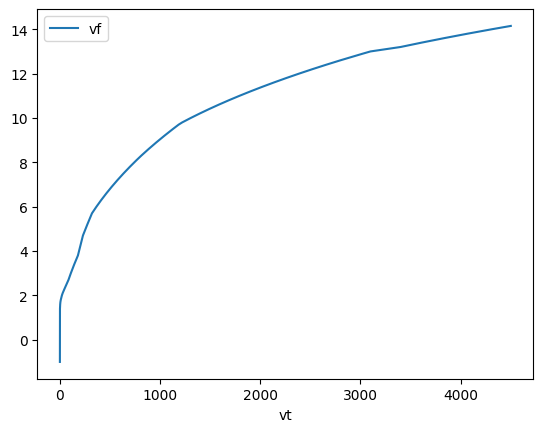

In [6]:
res.plot(x='vt',y='vf')

In [19]:
bom_url = "http://www.bom.gov.au/waterdata/services"

In [9]:
url_kiwis = "https://realtimedata.waternsw.com.au/cgi/webservice.exe"

In [20]:
def query2urlbom(query):
    c1, c2 = "'", "\""
    txt = re.sub(c1, c2, str(query))
    return f"{bom_url}?{txt}".strip()

# Download rating tables
datasource = "A"
api_version = "1"
nsites = len(sites)

# Download rating table for each time
query = {\
    "function": "get_effective_rating", \
    "version": api_version, \
    "params": {\
        "site_list": str(siteid), \
        "table_from": '100', \
        "table_to": '141', \
        'interval': '0.1',\
        'datetime': '20240101000000',\
        'force_range' : '1',\
        'quantised' : '1',\
        'shifts' : '1'    
    }
}
print(query)
url = query2urlbom(query)
print(url)
req1 = requests.get(url)
print(req1)
js1 = req1.json()



{'function': 'get_effective_rating', 'version': '1', 'params': {'site_list': '410021', 'table_from': '100', 'table_to': '141', 'interval': '0.1', 'datetime': '20240101000000', 'force_range': '1', 'quantised': '1', 'shifts': '1'}}
http://www.bom.gov.au/waterdata/services?{"function": "get_effective_rating", "version": "1", "params": {"site_list": "410021", "table_from": "100", "table_to": "141", "interval": "0.1", "datetime": "20240101000000", "force_range": "1", "quantised": "1", "shifts": "1"}}
<Response [500]>


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [21]:
qldurl = "https://water-monitoring.information.qld.gov.au/cgi/webservice.pl"

In [8]:
req1.headers

{'Date': 'Mon, 09 Sep 2024 23:08:14 GMT', 'Content-Type': 'application/json', 'Content-Length': '4782', 'Connection': 'keep-alive', 'Content': '', 'x-azure-ref': '20240909T230809Z-15d45f8776b6tln6st40qum0380000000g3000000000651z', 'X-Cache': 'CONFIG_NOCACHE', 'Accept-Ranges': 'bytes'}

In [9]:
js1

{'error_num': 0,
 'signature': '216B26238AC8BADF419DB6090702F431',
 'return': {'sites': [{'shifts': 'True',
    'ctf': '-0.5',
    'table_from': '100.00',
    'stage_high': '8.0',
    'interval': '0.1',
    'stage_low': '-1.0',
    'points': [{'q': 130, 'vt': '0.0', 'vf': '-1.0'},
     {'q': 130, 'vt': '0.0', 'vf': '-0.9'},
     {'q': 130, 'vt': '0.0', 'vf': '-0.8'},
     {'q': 130, 'vt': '0.0', 'vf': '-0.7'},
     {'q': 130, 'vt': '0.0', 'vf': '-0.6'},
     {'q': 130, 'vt': '0.0', 'vf': '-0.5'},
     {'q': 130, 'vt': '1.396116344', 'vf': '-0.4'},
     {'q': 130, 'vt': '9.086852876', 'vf': '-0.3'},
     {'q': 130, 'vt': '25.831075087', 'vf': '-0.2'},
     {'q': 130, 'vt': '54.208616088', 'vf': '-0.1'},
     {'q': 130, 'vt': '95.569235111', 'vf': '0.0'},
     {'q': 130, 'vt': '150.040637924', 'vf': '0.1'},
     {'q': 130, 'vt': '219.701087444', 'vf': '0.2'},
     {'q': 130, 'vt': '305.704364228', 'vf': '0.3'},
     {'q': 130, 'vt': '409.119939607', 'vf': '0.4'},
     {'q': 130, 'vt': '5

In [28]:
# {
# 'function' => 'get_cross_sections',
# 'version' => 1,
# 'params' => {
# 'site_list' => 'HYDSYS01,HYDSYS02',
# 'section_types' => ['xs'],
# 'comments' => 'yes',
# 'gauge_datum' => 'yes',
# 'start_date' => '19800101',
# 'end_date' => '19900101'
# }
# }

siteid = '422201F'

def query2urbom(query):
    c1, c2 = "'", "\""
    txt = re.sub(c1, c2, str(query))
    return f"{qldurl}?{txt}".strip()

# Download rating tables
datasource = "A"
api_version = "1"
nsites = len(sites)

# Download rating table for each time
query = {\
    "function": "get_cross_sections", \
    "version": api_version, \
    "params": {\
        "site_list": str(siteid), \
        'section_types': ['xs'], \
        'comments': 'yes',\
        'gauge_datum': 'yes',\
        'start_date': '19800101',\
        'end_date': '20240101'   
    }
}
print(query)
url = query2urbom(query)
req1 = requests.get(url)

js1 = req1.json()
js1


{'function': 'get_cross_sections', 'version': '1', 'params': {'site_list': '422201F', 'section_types': ['xs'], 'comments': 'yes', 'gauge_datum': 'yes', 'start_date': '19800101', 'end_date': '20240101'}}


{'error_num': 0,
 'disclaimer': 'https://www.qld.gov.au/legal/disclaimer',
 'return': [{'sections': {'236001': [{'order': 10,
      'rl': '11.728',
      'commnt': 'gl us strainer on top fence SOS',
      'chain': '665.160'},
     {'order': 20,
      'rl': '10.955',
      'commnt': 'gl us fence',
      'chain': '674.300'},
     {'order': 30, 'rl': '9.967', 'commnt': 'gl us fence', 'chain': '681.560'},
     {'order': 40, 'rl': '8.295', 'commnt': 'gl us fence', 'chain': '692.740'},
     {'order': 50, 'rl': '6.676', 'commnt': 'gl fence', 'chain': '700.440'},
     {'order': 60,
      'rl': '5.237',
      'commnt': 'gl fence post at tree',
      'chain': '706.410'},
     {'order': 70, 'rl': '3.196', 'commnt': 'gl fence', 'chain': '710.330'},
     {'order': 80,
      'rl': '2.459',
      'commnt': 'gl top gabion',
      'chain': '713.950'},
     {'order': 90,
      'rl': '1.909',
      'commnt': '183370 lb mm',
      'chain': '714.990'},
     {'order': 100, 'rl': '1.498', 'commnt': 'lb vee',

In [29]:
rs = js1['return'][0]['sections']
rskey = list(rs.keys())
rspd = pd.DataFrame(rs[rskey[0]])
print(rspd)
rspd['rl'] = rspd['rl'].astype('float')
rspd['chain'] = rspd['chain'].astype('float')


    order      rl                           commnt    chain
0      10  11.728  gl us strainer on top fence SOS  665.160
1      20  10.955                      gl us fence  674.300
2      30   9.967                      gl us fence  681.560
3      40   8.295                      gl us fence  692.740
4      50   6.676                         gl fence  700.440
5      60   5.237            gl fence post at tree  706.410
6      70   3.196                         gl fence  710.330
7      80   2.459                    gl top gabion  713.950
8      90   1.909                     183370 lb mm  714.990
9     100   1.498                           lb vee  731.190
10    110   1.065                              vee  735.600
11    120   1.487                           rb vee  739.990
12    130   1.927                     183371 mm rb  756.280
13    140   1.934                 rb bend wingwall  756.950
14    150   1.930         rb bend wingwall sealant  769.910
15    160   1.934              rb wingwa

<Axes: xlabel='chain'>

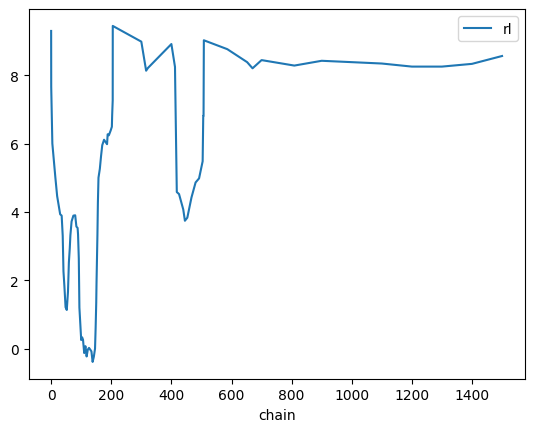

In [67]:
rspd.plot(x = 'chain',y='rl')

In [76]:
import scipy as sp
import matplotlib.pyplot as plt

In [73]:
minx = min(rspd['chain'])
maxx = max(rspd['chain'])
chainages = [float(a) for a in range(int(maxx)+1)]

interpfunc = sp.interpolate.interp1d(rspd['chain'].values, rspd['rl'].values,kind='linear')



In [74]:
newlevels = interpfunc(chainages)

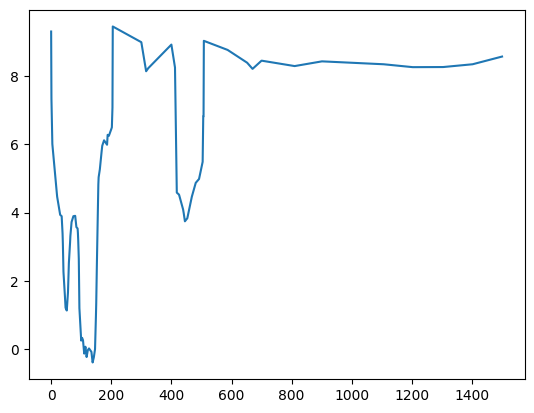

In [77]:
plt.plot(chainages, newlevels)

In [127]:
alllevels = np.arange(rspd['rl'].min(), min(rspd['rl'].max(),res['vf'].max()), 0.01)

pd_lvl_area = pd.DataFrame({'level':alllevels})
pd_lvl_area['area'] = np.nan
pd_lvl_area['area1'] = np.nan
for lvl in pd_lvl_area['level'].values:
    diffs = lvl - newlevels
    diffs[diffs<0] = 0.0
    area = sp.integrate.trapezoid(diffs,x=chainages)
    area1 = sp.integrate.simpson(diffs,x=chainages)
    i = np.where(pd_lvl_area['level']==lvl)[0]
    pd_lvl_area.loc[i,'area'] = area
    pd_lvl_area.loc[i,'area1'] = area1


Text(0, 0.5, 'Cross-sectional area (m^2)')

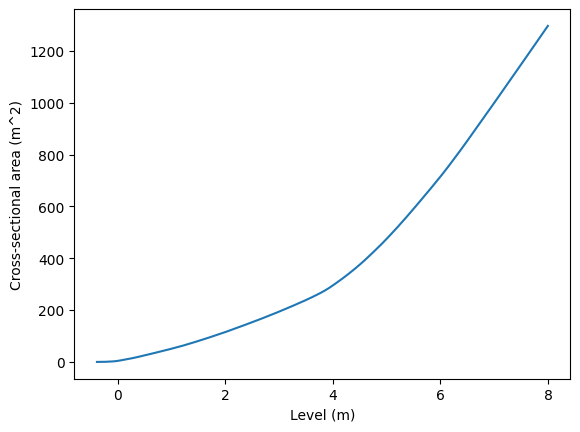

In [128]:
plt.plot(pd_lvl_area['level'], pd_lvl_area['area1'])
plt.xlabel("Level (m)")
plt.ylabel("Cross-sectional area (m^2)")

In [125]:
res

,q,vt,vf
0,130,0.000000,-1.0
1,130,0.000000,-0.9
2,130,0.000000,-0.8
3,130,0.000000,-0.7
4,130,0.000000,-0.6
...,...,...,...
86,130,96083.760941,7.6
87,130,103947.791757,7.7
88,130,111718.353307,7.8
89,130,119630.826002,7.9


In [133]:
interpfunc1 = sp.interpolate.interp1d(res['vf'].values, res['vt'].values,kind='linear')

pd_lvl_area['discharge'] = interpfunc1(pd_lvl_area['level'])/86.4
pd_lvl_area['velocity'] = pd_lvl_area['discharge']/pd_lvl_area['area']

Text(0, 0.5, 'Relative Level (m)')

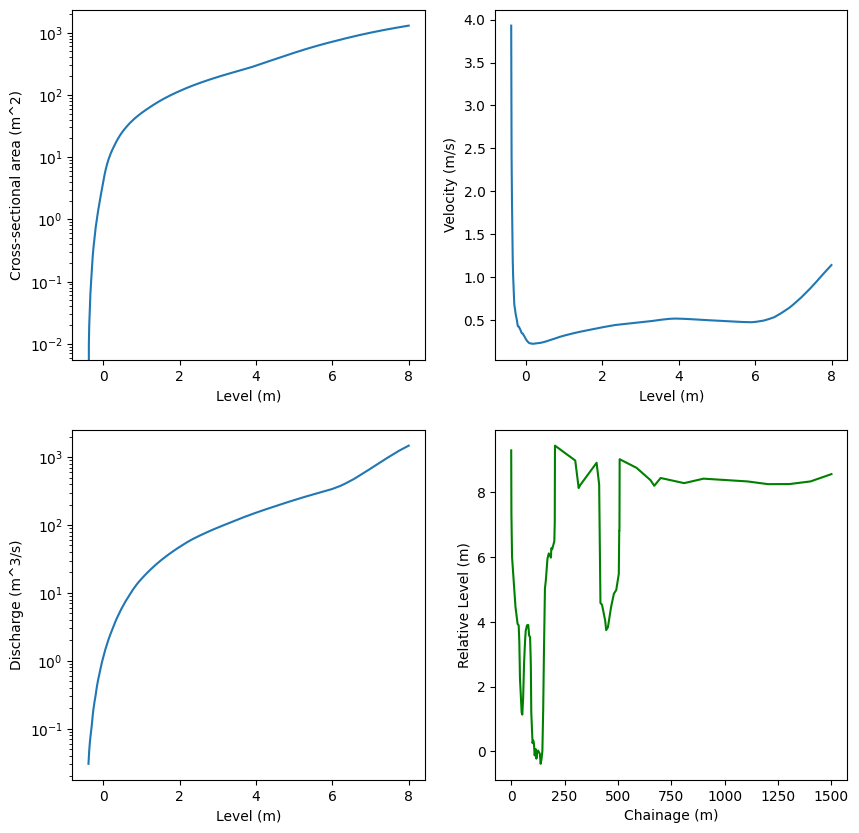

In [140]:
fig, axs = plt.subplots(2,2,figsize=(10,10) )
#fig.delaxes(axs[1,1])
axs[0,0].plot(pd_lvl_area['level'], pd_lvl_area['area'])
axs[0,0].set_xlabel("Level (m)")
axs[0,0].set_ylabel("Cross-sectional area (m^2)")
axs[0,0].set_yscale('log')

axs[1,0].plot(pd_lvl_area['level'], pd_lvl_area['discharge'])
axs[1,0].set_xlabel("Level (m)")
axs[1,0].set_ylabel("Discharge (m^3/s)")
axs[1,0].set_yscale('log')

axs[0,1].plot(pd_lvl_area['level'], pd_lvl_area['velocity'])
axs[0,1].set_xlabel("Level (m)")
axs[0,1].set_ylabel("Velocity (m/s)")

axs[1,1].plot(chainages, newlevels, c = 'green')
axs[1,1].set_xlabel("Chainage (m)")
axs[1,1].set_ylabel("Relative Level (m)")